# Goal of the Project:
Let’s predict the MonthlyIncome of an employee based on some numerical features using Linear Regression.

In [993]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score



In [994]:
df=pd.read_csv('employee.csv')
df.head(2)



,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7


In [995]:
df.size

51450

In [996]:
df.columns

Index(['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField', 'EmployeeCount',
       'EmployeeNumber', 'EnvironmentSatisfaction', 'Gender', 'HourlyRate',
       'JobInvolvement', 'JobLevel', 'JobRole', 'JobSatisfaction',
       'MaritalStatus', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
       'Over18', 'OverTime', 'PercentSalaryHike', 'PerformanceRating',
       'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager'],
      dtype='object')

In [997]:
df.isnull().sum().sum()  # no any null value

np.int64(0)

In [998]:
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


In [999]:
data=df.drop(['Attrition', 'BusinessTravel', 'DailyRate',
       'DistanceFromHome', 'Education', 'EmployeeCount',
       'EmployeeNumber',  'HourlyRate',
       'JobInvolvement', 'JobLevel', 'JobRole',
       'MaritalStatus',  'MonthlyRate', 'NumCompaniesWorked',
        'StandardHours', 'StockOptionLevel',
       'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager','Over18','OverTime'],axis=1)

In [1000]:
data.columns

Index(['Age', 'Department', 'EducationField', 'EnvironmentSatisfaction',
       'Gender', 'JobSatisfaction', 'MonthlyIncome', 'PercentSalaryHike',
       'PerformanceRating', 'RelationshipSatisfaction', 'TotalWorkingYears'],
      dtype='object')

In [1001]:
data.describe()

,Age,EnvironmentSatisfaction,JobSatisfaction,MonthlyIncome,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,TotalWorkingYears
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,36.923810,2.721769,2.728571,6502.931293,15.209524,3.153741,2.712245,11.279592
std,9.135373,1.093082,1.102846,4707.956783,3.659938,0.360824,1.081209,7.780782
min,18.000000,1.000000,1.000000,1009.000000,11.000000,3.000000,1.000000,0.000000
25%,30.000000,2.000000,2.000000,2911.000000,12.000000,3.000000,2.000000,6.000000
50%,36.000000,3.000000,3.000000,4919.000000,14.000000,3.000000,3.000000,10.000000
75%,43.000000,4.000000,4.000000,8379.000000,18.000000,3.000000,4.000000,15.000000
max,60.000000,4.000000,4.000000,19999.000000,25.000000,4.000000,4.000000,40.000000


In [1002]:
# Finding outliers using IQR method

numeric_cols = data.select_dtypes(include=['int64', 'float64']).columns

for i in numeric_cols:
    Q1 = data[i].quantile(0.25)
    Q3 = data[i].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = data[(data[i] < lower_bound) | (data[i] > upper_bound)]
    print(f"{i}: {len(outliers)} outliers")

Age: 0 outliers
EnvironmentSatisfaction: 0 outliers
JobSatisfaction: 0 outliers
MonthlyIncome: 114 outliers
PercentSalaryHike: 0 outliers
PerformanceRating: 226 outliers
RelationshipSatisfaction: 0 outliers
TotalWorkingYears: 63 outliers


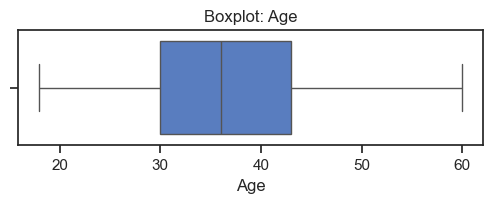

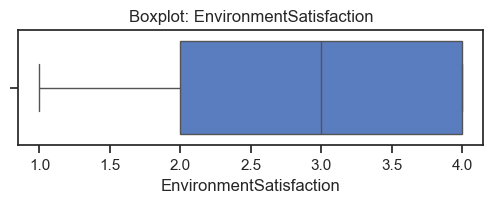

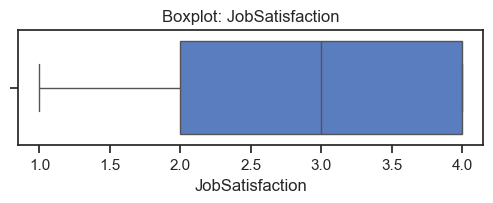

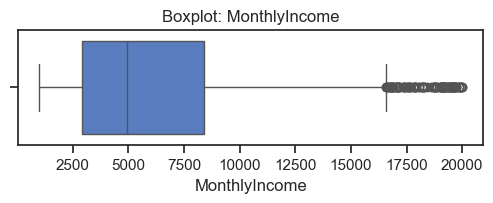

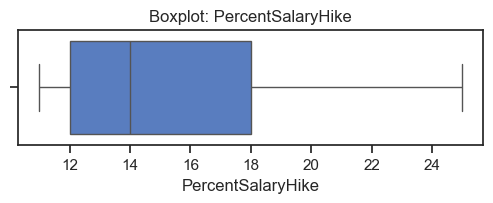

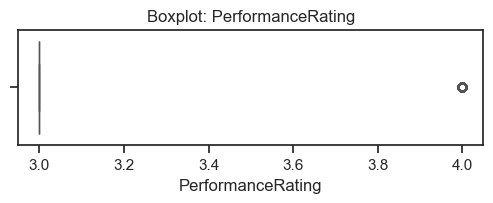

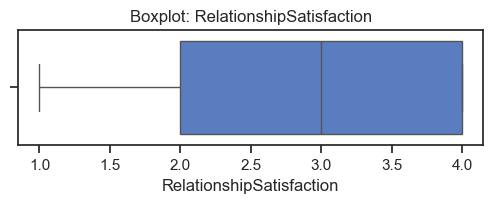

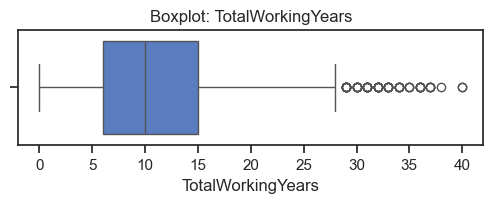

In [1003]:
# Visualizing outliers using boxplots
import seaborn as sns
import matplotlib.pyplot as plt

for col in numeric_cols:
    plt.figure(figsize=(6, 1.5))
    sns.boxplot(x=data[col])
    plt.title(f"Boxplot: {col}")
    plt.show()

In [1004]:
# Function to cap Outliers using IQR method
def cap_outliers_iqr(data, column):
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    # Cap the values
    data[column] = data[column].apply(
        lambda x: lower_bound if x < lower_bound else upper_bound if x > upper_bound else x
    )
    return data


In [1005]:
# Capping Outliers for specific columns

columns_to_cap = ['MonthlyIncome', 'PerformanceRating', 'TotalWorkingYears']

for col in columns_to_cap:
    data = cap_outliers_iqr(data, col)

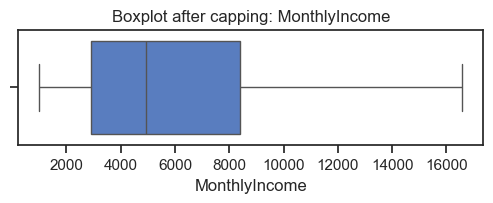

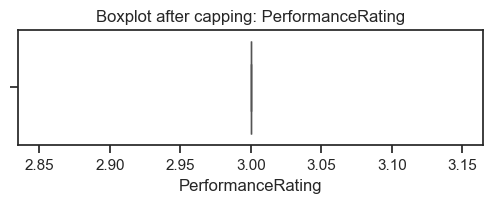

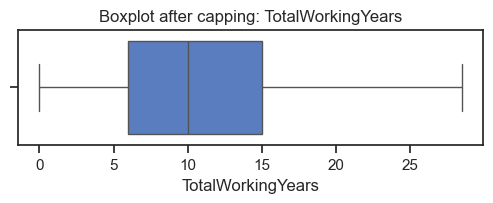

In [1006]:
# Visualizing the capped outliers using boxplots
import seaborn as sns
import matplotlib.pyplot as plt

for col in columns_to_cap:
    plt.figure(figsize=(6, 1.5))
    sns.boxplot(x=data[col])
    plt.title(f"Boxplot after capping: {col}")
    plt.show()


In [1007]:
# checking the number of outliers after capping 

for col in columns_to_cap:
    Q1 = data[col].quantile(0.25)
    Q3 = data[col].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    outliers = data[(data[col] < lower) | (data[col] > upper)]
    print(f"{col}: {len(outliers)} outliers (after capping)")


MonthlyIncome: 0 outliers (after capping)
PerformanceRating: 0 outliers (after capping)
TotalWorkingYears: 0 outliers (after capping)


In [1008]:
# splitting the data into features and target variable

numeric_features = [
    'Age',  'BusinessTravel', 'DailyRate', 
       'DistanceFromHome', 'Education',  'EmployeeCount',
       'EmployeeNumber', 'EnvironmentSatisfaction',  'HourlyRate',
       'JobInvolvement', 'JobLevel', 'JobRole', 'JobSatisfaction',
         'MonthlyRate', 'NumCompaniesWorked',
       'Over18', 'OverTime', 'PercentSalaryHike', 'PerformanceRating',
       'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager'
]
target = 'MonthlyIncome'

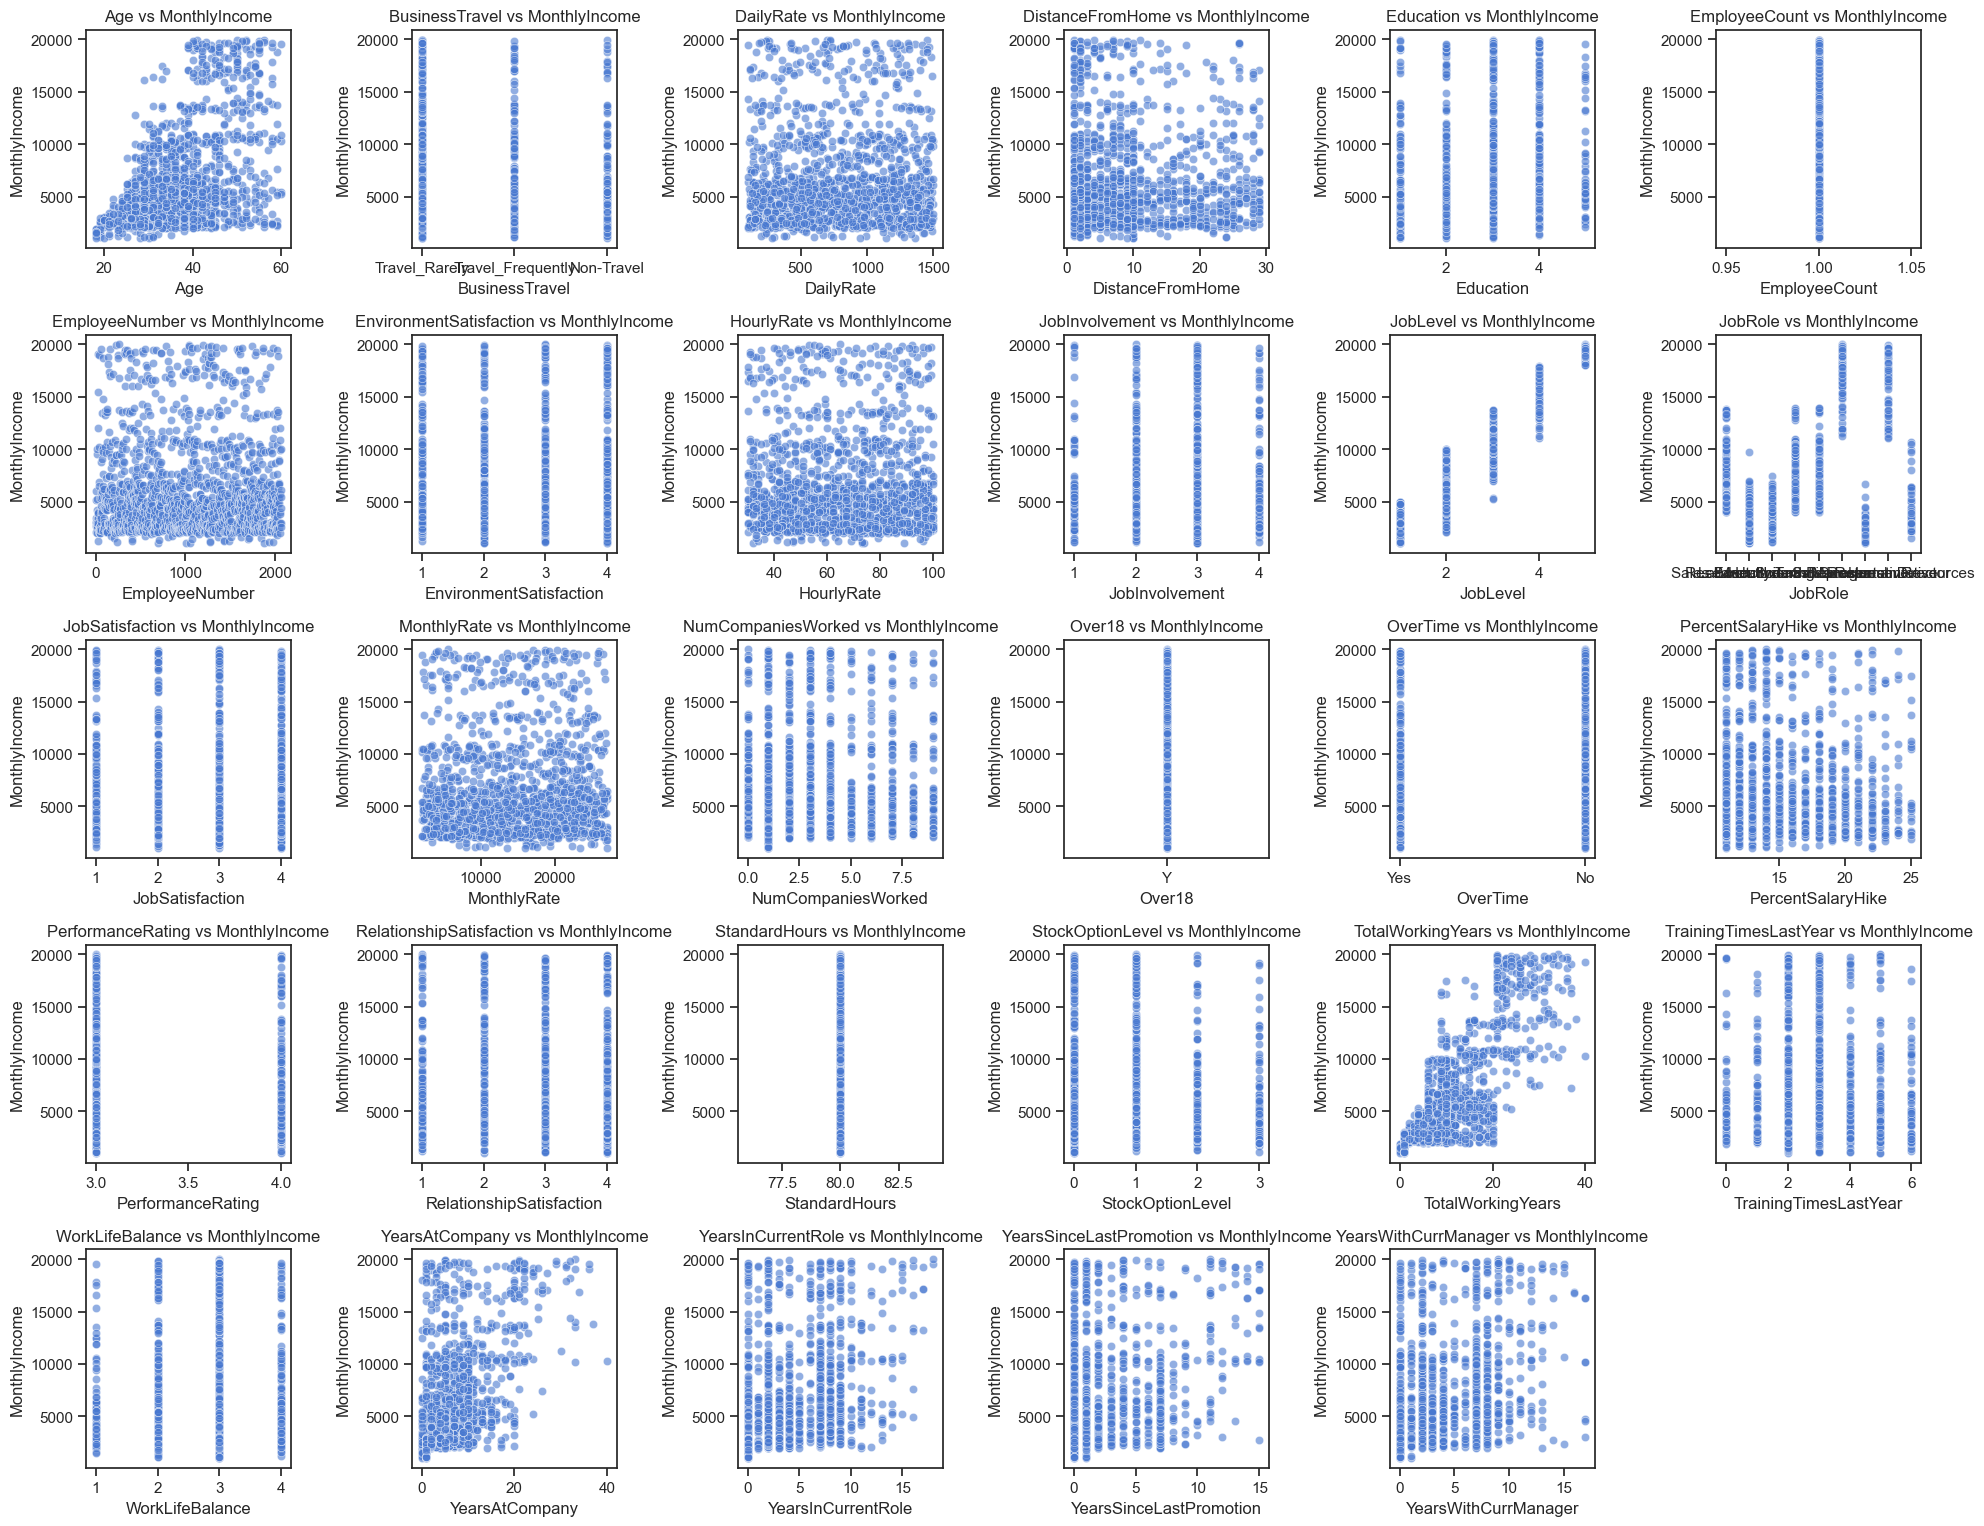

In [1009]:
# Create scatter plots for each feature vs salary
plt.figure(figsize=(20, 18))

for i, feature in enumerate(numeric_features):
    plt.subplot(6, 6, i+1)
    sns.scatterplot(data=df, x=feature, y=target, alpha=0.6)
    plt.title(f"{feature} vs {target}")

plt.tight_layout()
plt.show()

### selecting total working years as numeric feature beacuse it has high correlation with target variable

In [1010]:
# splitting the data into features and target variable

numeric_features = ['TotalWorkingYears']
target = 'MonthlyIncome'

In [1011]:
#  One-hot Encoding for Categorical Columns
df_encoded = pd.get_dummies(df, drop_first=True)

In [1012]:
#  Feature & Target Separation
X = df_encoded.drop('MonthlyIncome', axis=1)
y = df_encoded['MonthlyIncome']

In [1013]:
# Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [1014]:
# Linear Regression Model
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [1015]:
# Prediction & Evaluation
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f" Performance:Mean Squared Error (MSE): {mse}")
print(f"R² Score: {r2}")

 Performance:Mean Squared Error (MSE): 1358868.173729724
R² Score: 0.9378246275615026
